# Churn-Modelling

A predictive churn model is a powerful tool for identifying which of your customers will stop engaging with your business. With that information, you can built retention strategies, discount offers, email campaigns, and more that keep your high-value customers buying.

## Data Preprocessing
### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(X)
print('\n')
print(y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


[1 0 1 ... 1 1 0]


### Encoding categorical data (Geography, Gender)

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

In [6]:
print("X -> {}".format(X))
print('\n')
print("y -> {}".format(y))

X -> [[0.0000000e+00 0.0000000e+00 6.1900000e+02 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 1.0000000e+00 6.0800000e+02 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [0.0000000e+00 0.0000000e+00 5.0200000e+02 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [0.0000000e+00 0.0000000e+00 7.0900000e+02 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [1.0000000e+00 0.0000000e+00 7.7200000e+02 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [0.0000000e+00 0.0000000e+00 7.9200000e+02 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


y -> [1 0 1 ... 1 1 0]


## Exploratory Data Analysis

### Statistical Description of the dataset

In [7]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
import seaborn as sns
%matplotlib inline

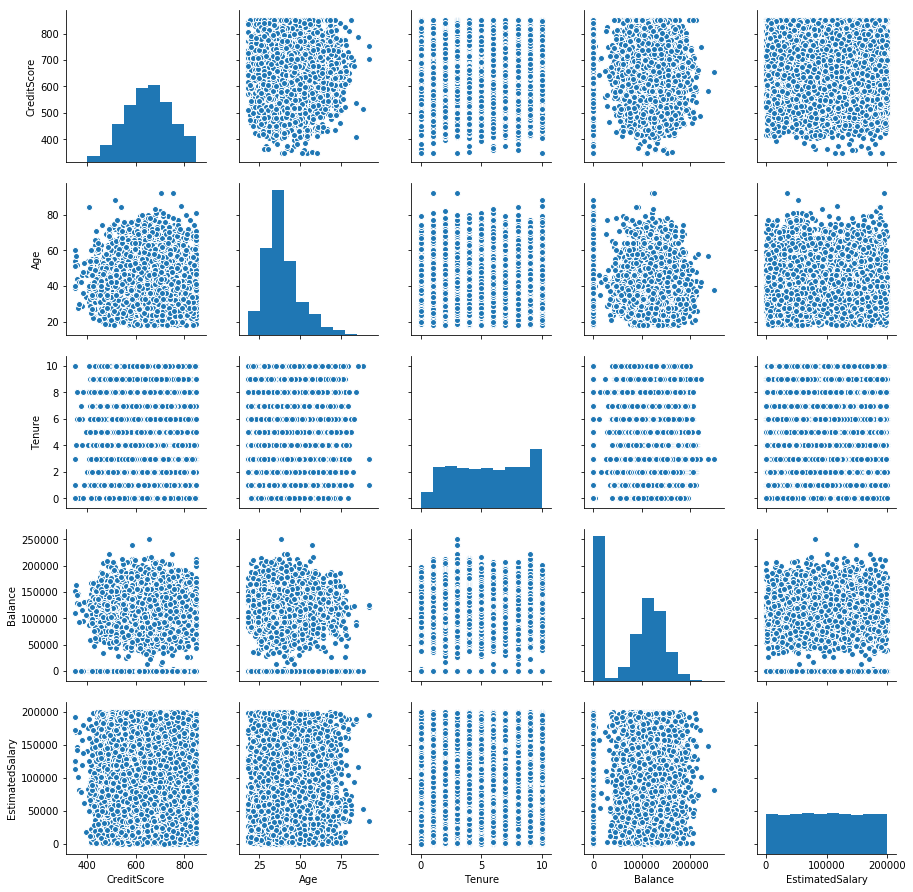

In [10]:
sns.pairplot(dataset[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])

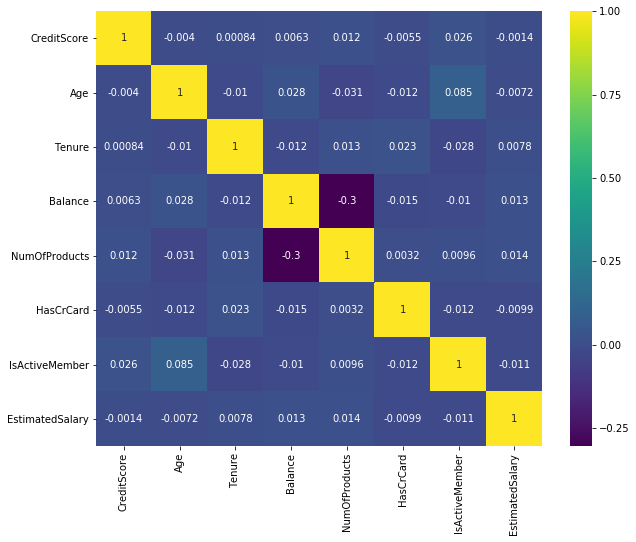

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']].corr(), annot=True, cmap='viridis')

### Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
print(X_train)

[[-0.5698444   1.74309049  0.16958176 ...  0.64259497 -1.03227043
   1.10643166]
 [ 1.75486502 -0.57369368 -2.30455945 ...  0.64259497  0.9687384
  -0.74866447]
 [-0.5698444  -0.57369368 -1.19119591 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [-0.5698444  -0.57369368  0.9015152  ...  0.64259497 -1.03227043
   1.41231994]
 [-0.5698444   1.74309049 -0.62420521 ...  0.64259497  0.9687384
   0.84432121]
 [ 1.75486502 -0.57369368 -0.28401079 ...  0.64259497 -1.03227043
   0.32472465]]


# Applying various machine learning algorithms

## Deploying Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
y_lr_pred = lr_classifier.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print("confusion_matrix:\n {}".format(confusion_matrix(y_test, y_lr_pred)))
print("\nclassification_report: \n {}".format(classification_report(y_test, y_lr_pred)))

confusion_matrix:
 [[1526   69]
 [ 309   96]]

classification_report: 
              precision    recall  f1-score   support

          0       0.83      0.96      0.89      1595
          1       0.58      0.24      0.34       405

avg / total       0.78      0.81      0.78      2000



## Deploying Support Vector Machine Classifier

In [17]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_svm_pred = svm_classifier.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print("confusion_matrix:\n {}".format(confusion_matrix(y_test, y_svm_pred)))
print("\nclassification_report: \n {}".format(classification_report(y_test, y_svm_pred)))

confusion_matrix:
 [[1547   48]
 [ 225  180]]

classification_report: 
              precision    recall  f1-score   support

          0       0.87      0.97      0.92      1595
          1       0.79      0.44      0.57       405

avg / total       0.86      0.86      0.85      2000



## Deploying Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
Rf_classifier = RandomForestClassifier()
Rf_classifier.fit(X_train, y_train)
y_rf_pred = Rf_classifier.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print("confusion_matrix:\n {}".format(confusion_matrix(y_test, y_rf_pred)))
print("\nclassification_report: \n {}".format(classification_report(y_test, y_rf_pred)))

confusion_matrix:
 [[1525   70]
 [ 208  197]]

classification_report: 
              precision    recall  f1-score   support

          0       0.88      0.96      0.92      1595
          1       0.74      0.49      0.59       405

avg / total       0.85      0.86      0.85      2000



## Building an Artificial Neural Network

In [21]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

/home/shivang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [22]:
# Initialising the ANN
classifier = Sequential()

In [23]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


## Training the ANN

In [24]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 1s 110us/step - loss: 0.4912 - acc: 0.7954
Epoch 2/100
8000/8000 [==============================] - 1s 77us/step - loss: 0.4266 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 84us/step - loss: 0.4204 - acc: 0.8091
Epoch 4/100
8000/8000 [==============================] - 1s 76us/step - loss: 0.4146 - acc: 0.8259
Epoch 5/100
8000/8000 [==============================] - 1s 77us/step - loss: 0.4107 - acc: 0.8305
Epoch 6/100
8000/8000 [==============================] - 1s 74us/step - loss: 0.4071 - acc: 0.8335
Epoch 7/100
8000/8000 [==============================] - 1s 76us/step - loss: 0.4048 - acc: 0.8335
Epoch 8/100
8000/8000 [==============================] - 1s 93us/step - loss: 0.4030 - acc: 0.8332
Epoch 9/100
8000/8000 [==============================] - 1s 160us/step - loss: 0.4015 - acc: 0.8336
Epoch 10/100
8000/8000 [==============================] - 1s 111us/step - loss: 0.4006 - acc: 0.8341
Epoch 

8000/8000 [==============================] - 1s 75us/step - loss: 0.3448 - acc: 0.8597
Epoch 83/100
8000/8000 [==============================] - 1s 75us/step - loss: 0.3450 - acc: 0.8604
Epoch 84/100
8000/8000 [==============================] - 1s 77us/step - loss: 0.3446 - acc: 0.8626
Epoch 85/100
8000/8000 [==============================] - 1s 78us/step - loss: 0.3437 - acc: 0.8607
Epoch 86/100
8000/8000 [==============================] - 1s 93us/step - loss: 0.3444 - acc: 0.8611
Epoch 87/100
8000/8000 [==============================] - 1s 75us/step - loss: 0.3436 - acc: 0.8617
Epoch 88/100
8000/8000 [==============================] - 1s 92us/step - loss: 0.3442 - acc: 0.8616
Epoch 89/100
8000/8000 [==============================] - 1s 75us/step - loss: 0.3430 - acc: 0.8640
Epoch 90/100
8000/8000 [==============================] - 1s 85us/step - loss: 0.3439 - acc: 0.8612
Epoch 91/100
8000/8000 [==============================] - 1s 87us/step - loss: 0.3437 - acc: 0.8625
Epoch 92/100


In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [28]:
print (cm)

[[1525   70]
 [ 203  202]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.96      0.92      1595
          1       0.74      0.50      0.60       405

avg / total       0.85      0.86      0.85      2000



In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

In [31]:
X_pca

array([[ 2.0518478 ,  0.60570437],
       [-1.56368114, -0.55007194],
       [-0.5326157 , -0.06866931],
       ...,
       [-0.48768333,  0.59445388],
       [ 2.10582722,  0.27929122],
       [-2.0070203 ,  0.29731549]])

In [32]:
pca_df = pd.DataFrame(data=X_pca, columns=["pca 1", "pca 2"])
pca_df["pred"] = y_train

## Evaluation

Here there's a close competition but Support Vector Machines win with the Precision = 0.86, Recall =0.86 and F1-score = 0.85.